In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns


In [7]:
stream_df = pd.read_csv("data/tracks_by_time_and_streams.csv")

stream_df = stream_df.drop(columns='Unnamed: 0')

In [8]:
top_artists = stream_df.sort_values(by="ms_played", ascending=False)

In [9]:
top_artists.head(20)

,master_metadata_track_name,master_metadata_album_artist_name,ms_played,stream_count
11460,If You Want To,beabadoobee,33666764,203
24268,Tribe (with J. Cole),Bas,25039302,151
11849,Is It The Answer,Reality Club,21219553,143
20434,"Singing Didgeridoo and Sound of Nature, Forest...",Didgeridoo Aboriginal Dreamtime,21180901,40
19903,Sense,Last Dinosaurs,20894044,136
4201,Change,J. Cole,20847747,116
15821,Never Get Better,Reality Club,20476253,92
21109,Soundtrack 2 My Life,Kid Cudi,20460156,145
26911,Zoom,Last Dinosaurs,20096308,156
22311,TEMPTATION,Joey Bada$$,20034598,139


In [10]:
# 1. Select top N artists (e.g., top 10)
N = 10
top_N_artists = top_artists.head(N).index.tolist()

# 2. Create dummy variables
# First, filter your original dataframe to only include rows with artist name
filtered_df = stream_df.dropna(subset=['master_metadata_album_artist_name'])

# Add a column for each top artist
for artist in top_N_artists:
    filtered_df[f'is_{artist.replace(" ", "_")}'] = (filtered_df['master_metadata_album_artist_name'] == artist).astype(int)

# 3. Prepare your regression dataset
X = filtered_df[[f'is_{artist.replace(" ", "_")}' for artist in top_N_artists]]
y = filtered_df['ms_played']

# Now you're ready to run the regression

filtered_df

AttributeError: 'int' object has no attribute 'replace'

In [8]:
# Using scikit-learn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Get coefficients
coefficients = pd.DataFrame({
    'Artist': top_N_artists,
    'Coefficient': model.coef_
})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# These coefficients tell you how much each artist influences listening duration
print(coefficients)

                     Artist   Coefficient
1              Reality Club  3.660916e+06
0            Last Dinosaurs  3.522135e+06
3               Saint Motel  2.389221e+06
9               beabadoobee  1.516994e+06
5          Kero Kero Bonito  1.410543e+06
4      Two Door Cinema Club  1.198073e+06
2                Red Velvet  1.180816e+06
6       Sergei Rachmaninoff  9.949981e+05
7                     Drake  7.612911e+05
8  Pyotr Ilyich Tchaikovsky  2.912015e+05


/var/folders/r9/9h7rd6zd4tz1_bywnwmj25hw0000gn/T/ipykernel_73646/3433794282.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Minutes', y='Artist', data=df, palette='viridis')


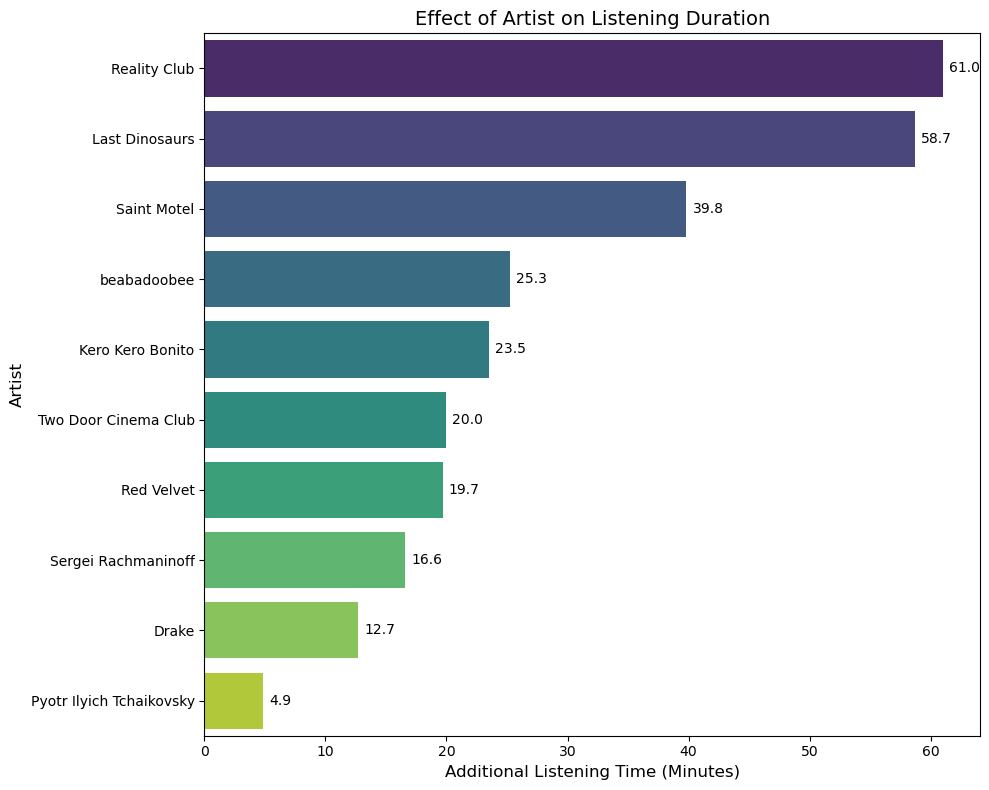

In [9]:
# Assuming your coefficients are in a DataFrame like this
data = {
    'Artist': ['Reality Club', 'Last Dinosaurs', 'Saint Motel', 'beabadoobee', 
               'Kero Kero Bonito', 'Two Door Cinema Club', 'Red Velvet', 
               'Sergei Rachmaninoff', 'Drake', 'Pyotr Ilyich Tchaikovsky'],
    'Coefficient': [3.660916e+06, 3.522135e+06, 2.389221e+06, 1.516994e+06,
                    1.410543e+06, 1.198073e+06, 1.180816e+06, 9.949981e+05,
                    7.612911e+05, 2.912015e+05]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert milliseconds to minutes for better readability
df['Minutes'] = df['Coefficient'] / (1000 * 60)

# Sort by coefficient value (optional)
df = df.sort_values('Minutes', ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Minutes', y='Artist', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Additional Listening Time (Minutes)', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.title('Effect of Artist on Listening Duration', fontsize=14)

# Add value labels to the end of each bar
for i, v in enumerate(df['Minutes']):
    ax.text(v + 0.5, i, f"{v:.1f}", va='center')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# plt.savefig('artist_listening_duration.png', dpi=300, bbox_inches='tight')

In [10]:


# If using sklearn
print(f"Intercept: {model.intercept_}")

Intercept: 248695.1880436435


In [11]:
stream_df

,master_metadata_track_name,master_metadata_album_artist_name,ms_played,ts
0,"""A New Game"" - Da Riffs Madden Mix",Sam Spence,19613,2
1,"""Casta Diva"" from Norma",Bellini,2856,1
2,"""I just want to make buscuits with papa"" (dial...",Irons In the Fire,19839,3
3,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,149050,1
4,"""Magnificent Eleven"" - Da Riffs Madden Mix",Sam Spence,59558,3
...,...,...,...,...
27861,한 폭의 그림 Paradise,S.E.S.,355106,11
27862,해변의 여인,COOL,3575,1
27863,행복 (Happiness),Red Velvet,3094901,26
27864,힐끔힐끔 Peep,ONE,358445,3


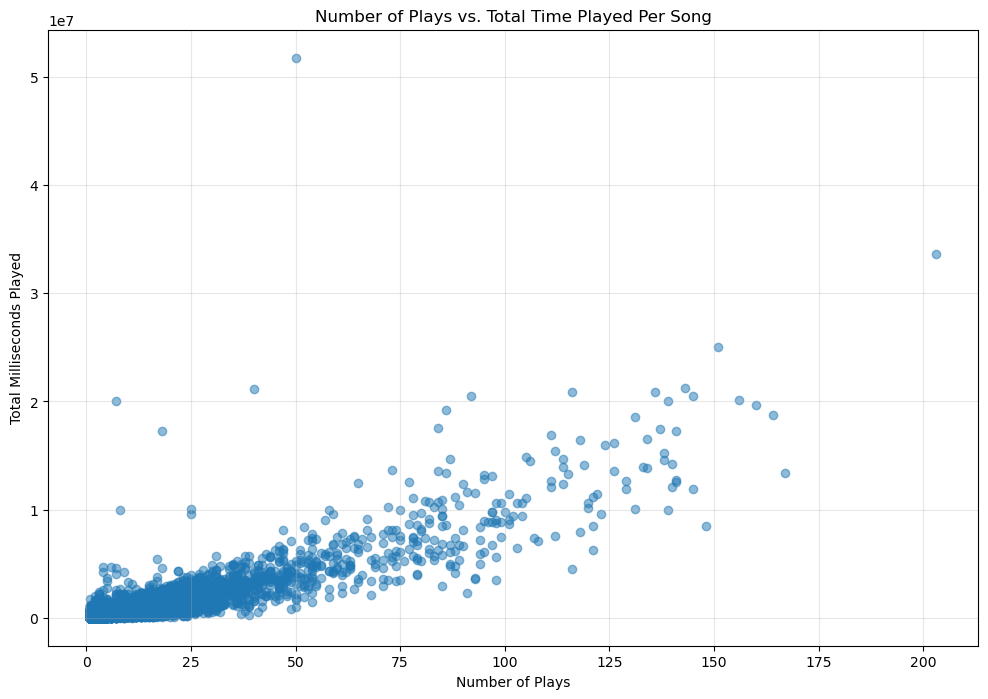

In [12]:
plt.figure(figsize=(12, 8))
plt.scatter(stream_df['ts'], stream_df['ms_played'], alpha=0.5)
plt.title('Number of Plays vs. Total Time Played Per Song')
plt.xlabel('Number of Plays')
plt.ylabel('Total Milliseconds Played')
plt.grid(True, alpha=0.3)
plt.show()

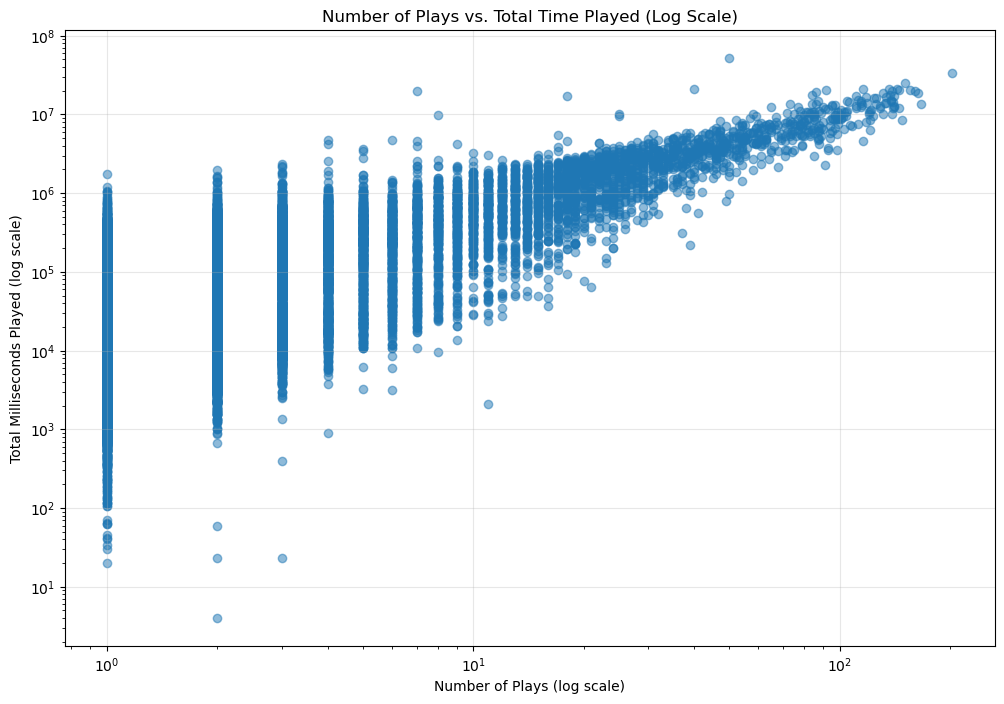

In [13]:
plt.figure(figsize=(12, 8))
plt.scatter(stream_df['ts'], stream_df['ms_played'], alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title('Number of Plays vs. Total Time Played (Log Scale)')
plt.xlabel('Number of Plays (log scale)')
plt.ylabel('Total Milliseconds Played (log scale)')
plt.grid(True, alpha=0.3)
plt.show()

In [14]:
X = stream_df[['ts', 'ms_played']].copy()
X['log_plays'] = np.log1p(X['ts'])
X['log_ms_played'] = np.log1p(X['ms_played'])

# Step 2: Extract just the log-transformed features for clustering
features = X[['log_plays', 'log_ms_played']]

# Step 3: Standardize the features (important for k-means)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

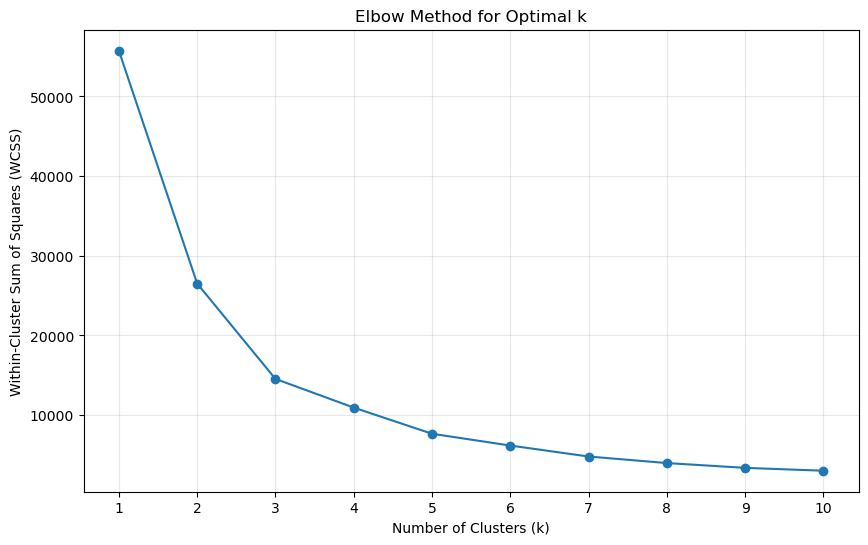

In [15]:
# Determine optimal k using the elbow method
wcss = []  # Within-cluster sum of squares
k_range = range(1, 11)  # Testing k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # inertia_ is the sum of squared distances to the nearest centroid

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True, alpha=0.3)
plt.xticks(k_range)
plt.show()

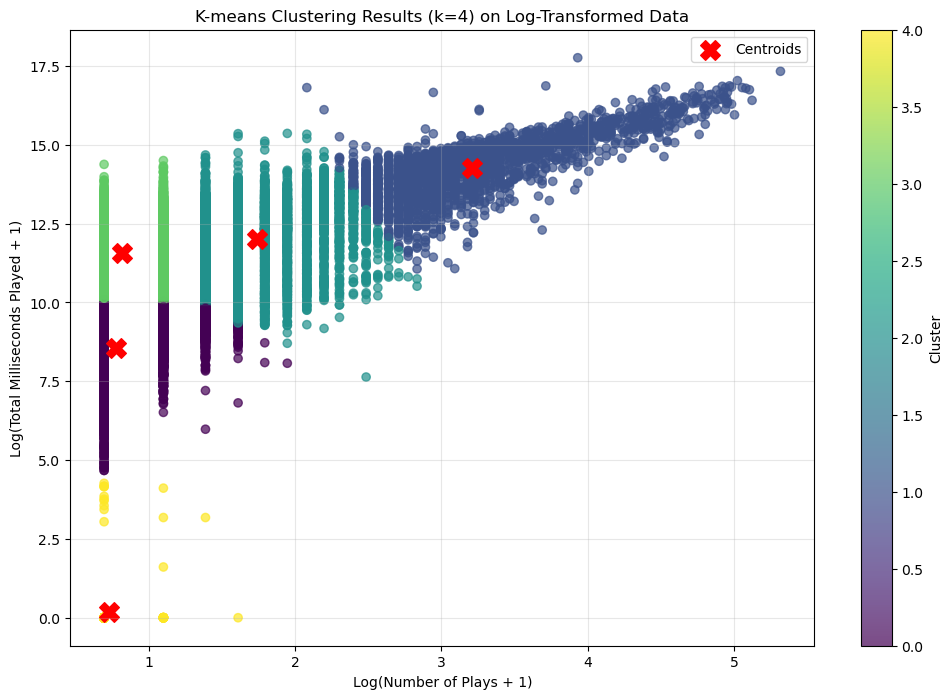

In [17]:
# Apply k-means with the optimal number of clusters (k=4)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to your original data
stream_df['cluster'] = clusters

# Visualize the clusters on the log-transformed data
plt.figure(figsize=(12, 8))
plt.scatter(X['log_plays'], X['log_ms_played'], c=clusters, cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Log(Number of Plays + 1)')
plt.ylabel('Log(Total Milliseconds Played + 1)')
plt.title('K-means Clustering Results (k=4) on Log-Transformed Data')
plt.grid(True, alpha=0.3)

# Add cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, marker='X', c='red', label='Centroids')
plt.legend()
plt.show()

In [186]:
stream_df

,Unnamed: 0,master_metadata_track_name,master_metadata_album_artist_name,ms_played,ts,cluster
0,0,"""A New Game"" - Da Riffs Madden Mix",Sam Spence,19613,2,1
1,1,"""Casta Diva"" from Norma",Bellini,2856,1,1
2,2,"""I just want to make buscuits with papa"" (dial...",Irons In the Fire,19839,3,0
3,3,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,149050,1,0
4,4,"""Magnificent Eleven"" - Da Riffs Madden Mix",Sam Spence,59558,3,0
...,...,...,...,...,...,...
27861,27861,한 폭의 그림 Paradise,S.E.S.,355106,11,2
27862,27862,해변의 여인,COOL,3575,1,1
27863,27863,행복 (Happiness),Red Velvet,3094901,26,2
27864,27864,힐끔힐끔 Peep,ONE,358445,3,0


In [187]:
stream_df["cluster"].value_counts()

cluster
1    13355
0    11184
2     3053
3      274
Name: count, dtype: int64

In [188]:
cluster_0 = stream_df.loc[stream_df["cluster"] == 0].sort_values(by='ms_played', ascending=False)
cluster_1 = stream_df.loc[stream_df["cluster"] == 1].sort_values(by='ms_played', ascending=False)
cluster_2 = stream_df.loc[stream_df["cluster"] == 2].sort_values(by='ms_played', ascending=False)
cluster_3 = stream_df.loc[stream_df["cluster"] == 3].sort_values(by='ms_played', ascending=False)




cluster_0.groupby("master_metadata_album_artist_name").agg({
    'ms_played': 'sum',
    'ts': 'count'
    
}).reset_index().sort_values(by="ms_played", ascending=False)

,master_metadata_album_artist_name,ms_played,ts
4409,Sergei Rachmaninoff,48972932,57
4015,Pyotr Ilyich Tchaikovsky,37618656,110
3029,Ludwig van Beethoven,11531267,29
4115,Red Velvet,11459886,48
4782,TWICE,11248653,50
...,...,...,...
3605,Nixis,13722,1
3150,Mak Sauce,13128,1
1554,Eve,13000,1
2909,Lil Kleine,12758,1


In [197]:
cluster_0.groupby("master_metadata_album_artist_name").agg({
    'ms_played': 'sum',
    'ts': 'count'
    
}).reset_index().sort_values(by="ms_played", ascending=False)

,master_metadata_album_artist_name,ms_played,ts
4409,Sergei Rachmaninoff,48972932,57
4015,Pyotr Ilyich Tchaikovsky,37618656,110
3029,Ludwig van Beethoven,11531267,29
4115,Red Velvet,11459886,48
4782,TWICE,11248653,50
...,...,...,...
3605,Nixis,13722,1
3150,Mak Sauce,13128,1
1554,Eve,13000,1
2909,Lil Kleine,12758,1


In [198]:
cluster_3.groupby("master_metadata_album_artist_name").agg({
    'ms_played': 'sum',
    'ts': 'count'
    
}).reset_index().sort_values(by="ms_played", ascending=False)

,master_metadata_album_artist_name,ms_played,ts
67,Fabio Góes,70,7
40,Carl Carlton,64,1
72,Frédéric Chopin,63,3
27,Big K.R.I.T.,63,1
161,Posture,60,1
...,...,...,...
80,Good Scott,0,1
81,Govana,0,1
82,Greg Edmonson,0,1
83,Haley Reinhart,0,1


In [196]:
cluster_2.groupby("master_metadata_album_artist_name").agg({
    'ms_played': 'sum',
    'ts': 'count'
    
}).reset_index().sort_values(by="ms_played", ascending=False)

,master_metadata_album_artist_name,ms_played,ts
681,Last Dinosaurs,225787710,39
986,Reality Club,146437028,24
1036,Saint Motel,133378208,28
987,Red Velvet,131425317,46
1267,Two Door Cinema Club,106314116,22
...,...,...,...
184,Catfish and the Bottlemen,29149,1
545,Jason Derulo,28362,1
376,Fifth Harmony,27229,1
1198,The Night Lights,27165,1


In [189]:
cluster_0.loc[cluster_0["master_metadata_album_artist_name"] == "Red Velvet"]

,Unnamed: 0,master_metadata_track_name,master_metadata_album_artist_name,ms_played,ts,cluster
9575,9575,Happily Ever After,Red Velvet,502181,5,0
2750,2750,Bing Bing,Red Velvet,496168,4,0
14096,14096,Lucky Girl,Red Velvet,463299,4,0
20753,20753,So Good,Red Velvet,447169,5,0
20927,20927,Somethin Kinda Crazy,Red Velvet,442443,4,0
26879,26879,ZOOM,Red Velvet,437932,3,0
23920,23920,Time Slip,Red Velvet,432399,6,0
18649,18649,Rebirth - Instrumental,Red Velvet,426612,2,0
19700,19700,Sayonara,Red Velvet,392400,2,0
19579,19579,Sassy Me,Red Velvet,359330,5,0


In [1]:
cluster_2.loc[cluster_2["master_metadata_album_artist_name"] == "Red Velvet"]

NameError: name 'cluster_2' is not defined

In [195]:
low_streams = stream_df.loc[(stream_df["ms_played"] > 30000) & (stream_df["ts"] > 2)].sort_values(by='ms_played', ascending=False)

low_streams["cluster"].value_counts()

cluster
2    3043
0    2844
Name: count, dtype: int64

In [194]:
len(cluster_1)

13355